24-06-22 22:48:52 - Searching image.png in 12 length datastore
24-06-22 22:48:54 - find function duration 1.8145005702972412 seconds


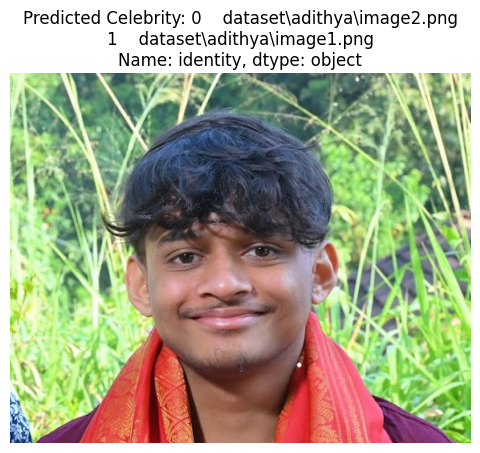

The celebrity in the image is most likely: 0    dataset\adithya\image2.png
1    dataset\adithya\image1.png
Name: identity, dtype: object


In [10]:
from deepface import DeepFace
import matplotlib.pyplot as plt
import cv2

# Path to your image
img_path = "image.png"

# Perform facial recognition
try:
    result = DeepFace.find(img_path=img_path, db_path="dataset", model_name="Facenet", enforce_detection=False)
    
    if len(result) > 0:
        # Get the top match
        top_match = result[0]
        identity = top_match["identity"]
        
        # Display the result
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.title(f"Predicted Celebrity: {identity}")
        plt.axis('off')
        plt.show()
        
        print(f"The celebrity in the image is most likely: {identity}")
    else:
        print("No match found in the database.")
        
except Exception as e:
    print(f"An error occurred: {str(e)}")

In [12]:
import re

def extract_celebrity_name(result_string):
    # Use regex to find the pattern between 'dataset\' and '\image'
    match = re.search(r'dataset\\(.+?)\\', result_string)
    if match:
        return match.group(1)
    else:
        return "Name not found"

celebrity_name = extract_celebrity_name(str(identity))
print(f"The celebrity is: {celebrity_name}")

The celebrity is: adithya


In [16]:
import tensorflow as tf
import tensorflow_hub as hub

# Load the model
model = hub.load('https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/classification/4')

# Preprocess the image
image = tf.io.read_file('a.jpeg')
image = tf.image.decode_jpeg(image, channels=3)
image = tf.image.resize(image, [224, 224])
image = tf.keras.applications.mobilenet_v2.preprocess_input(image)
image = image[tf.newaxis, ...]

# Make a prediction
predictions = model(image)
predicted_class = tf.argmax(predictions, axis=1)

In [18]:
predicted_class

<tf.Tensor: shape=(1,), dtype=int64, numpy=array([434], dtype=int64)>

In [19]:
pip install streamlit opencv-python-headless deepface pillow

  Using cached streamlit-1.36.0-py2.py3-none-any.whl (8.6 MB)
  Using cached opencv_python_headless-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)
  Using cached altair-5.3.0-py3-none-any.whl (857 kB)
  Using cached GitPython-3.1.43-py3-none-any.whl (207 kB)
  Using cached cachetools-5.3.3-py3-none-any.whl (9.3 kB)
  Using cached pydeck-0.9.1-py2.py3-none-any.whl (6.9 MB)
  Using cached jsonschema-4.22.0-py3-none-any.whl (88 kB)
  Using cached gitdb-4.0.11-py3-none-any.whl (62 kB)
  Using cached jsonschema_specifications-2023.12.1-py3-none-any.whl (18 kB)
  Using cached referencing-0.35.1-py3-none-any.whl (26 kB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\Users\\adith\\Desktop\\face\\env\\Lib\\site-packages\\cv2\\cv2.pyd'
Check the permissions.


[notice] A new release of pip is available: 23.0.1 -> 24.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
import streamlit as st
import cv2
import numpy as np
from deepface import DeepFace
import os
from PIL import Image

# Function to extract celebrity name from the result
def extract_celebrity_name(result_string):
    parts = result_string.split('\\')
    if len(parts) > 1:
        return parts[-2]
    return "Name not found"

# Function to perform celebrity recognition
def recognize_celebrity(image):
    try:
        result = DeepFace.find(img_path=image, db_path="path/to/your/celebrity/database", enforce_detection=False)
        if len(result) > 0:
            identity = result[0]["identity"]
            celebrity_name = extract_celebrity_name(identity)
            return celebrity_name, identity
        else:
            return "No match found", None
    except Exception as e:
        return f"An error occurred: {str(e)}", None

# Streamlit app
def main():
    st.title("Celebrity Recognition App")

    # Sidebar for navigation
    page = st.sidebar.selectbox("Choose a method", ["Upload Image", "Use Webcam"])

    if page == "Upload Image":
        st.header("Upload an Image")
        uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])
        
        if uploaded_file is not None:
            image = Image.open(uploaded_file)
            st.image(image, caption="Uploaded Image", use_column_width=True)
            
            if st.button("Recognize Celebrity"):
                with st.spinner("Recognizing..."):
                    # Save the uploaded image temporarily
                    temp_path = "temp_upload.jpg"
                    image.save(temp_path)
                    
                    celebrity_name, match_path = recognize_celebrity(temp_path)
                    st.success(f"Recognized Celebrity: {celebrity_name}")
                    
                    if match_path:
                        match_image = Image.open(match_path)
                        st.image(match_image, caption="Matching Image from Dataset", use_column_width=True)
                    
                    # Remove the temporary file
                    os.remove(temp_path)

    elif page == "Use Webcam":
        st.header("Webcam Celebrity Recognition")
        run = st.checkbox("Run")
        FRAME_WINDOW = st.image([])
        camera = cv2.VideoCapture(0)

        while run:
            _, frame = camera.read()
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            FRAME_WINDOW.image(frame)

            # Perform recognition every 30 frames
            if cv2.waitKey(1) % 30 == 0:
                # Save the frame temporarily
                temp_path = "temp_webcam.jpg"
                cv2.imwrite(temp_path, cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))
                
                celebrity_name, _ = recognize_celebrity(temp_path)
                st.text(f"Recognized Celebrity: {celebrity_name}")
                
                # Remove the temporary file
                os.remove(temp_path)

        camera.release()

if __name__ == "__main__":
    main()

ModuleNotFoundError: No module named 'streamlit'